In [2]:
import pandas as pd 
import numpy as np

## We will be using dataset available from Kaggle:
 <br> <url> https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download </url>
 We shall use this dataset to predict the type of breast cancer

In [3]:
dftmor = pd.read_csv('Data.csv').set_index('id').drop(columns=['Unnamed: 32'])
dftmor

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
X = dftmor.drop(columns=['diagnosis'])
X.shape

In [ ]:
y = dftmor['diagnosis'].values
y.shape

## Understand and Visualize the Data
- In this phase, we clean up and understand the data
- This is really important since a lack of understand to the system will lead to a lofty model that have pretty performance but useless in real life practice.

In [5]:
dftmor.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [6]:
dftmor['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [7]:
import matplotlib.pyplot as plt

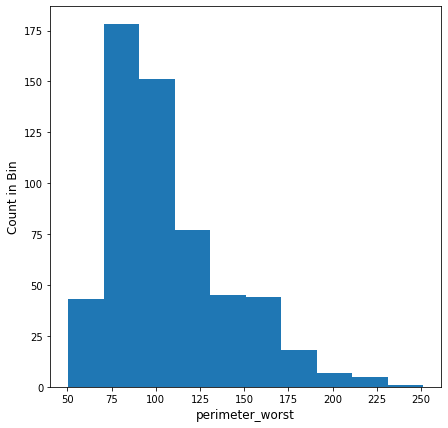

In [13]:
plt.figure(figsize=(7,7))
feat_nam = 'perimeter_worst'
plt.hist(dftmor[feat_nam], bins=10)
plt.xlabel('{}'.format(feat_nam), fontsize=12)
plt.ylabel('Count in Bin', fontsize=12)
plt.show()

In [16]:
import seaborn as sns

In [14]:
dftmor.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


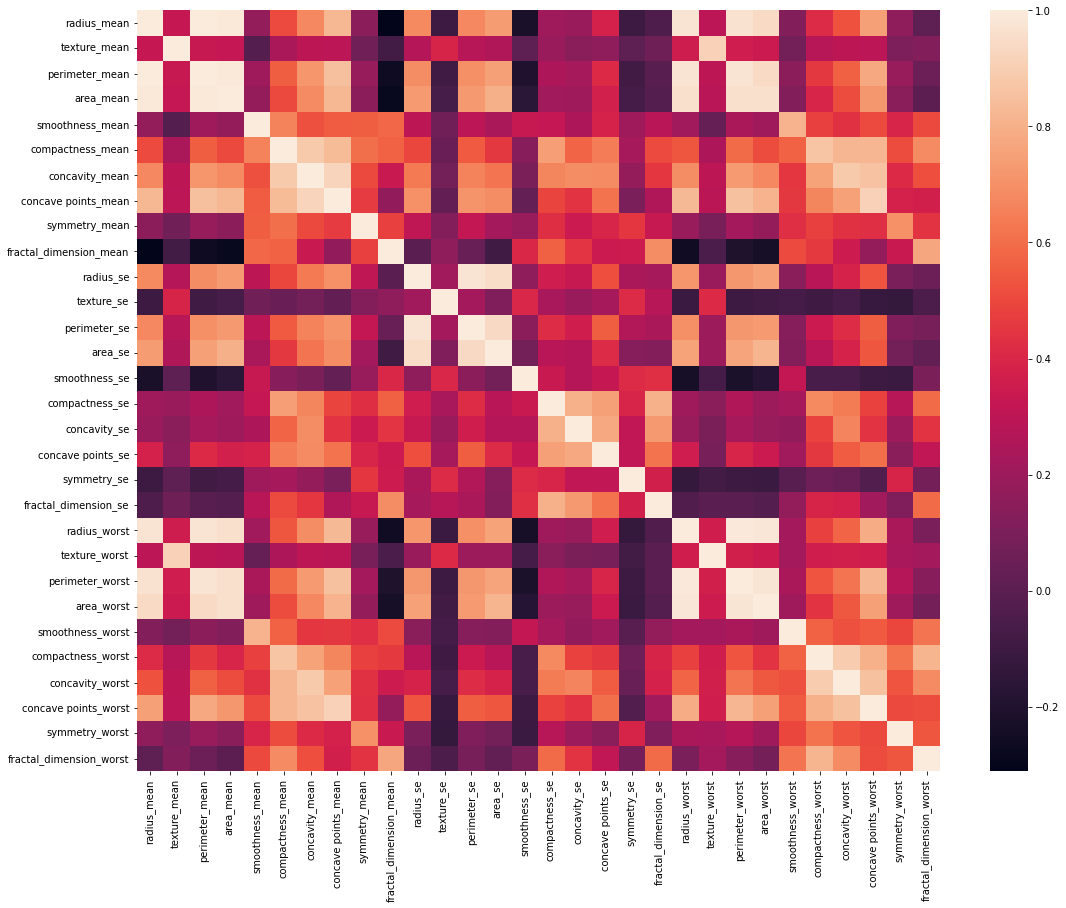

In [17]:
plt.figure(figsize=(18,14))
sns.heatmap(dftmor.corr())
plt.show()

## Train test split

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit

In [19]:
y = dftmor['diagnosis'].replace({'M':0, 'B':1}).values
X = dftmor.drop(columns=['diagnosis']).values

In [22]:
X.shape

(569, 30)

In [27]:
X_test, X_train, y_test ,y_train = train_test_split(X, y, test_size=0.7, random_state=42)

In [28]:
print(" X_train size: {} \n y_train size: {} \n X_test size: {} \n y_test size: {}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

 X_train size: (399, 30) 
 y_train size: (399,) 
 X_test size: (170, 30) 
 y_test size: (170,)


In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score, roc_curve, confusion_matrix

In [30]:
dtclf = DecisionTreeClassifier()
dtclf.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
y_pred = dtclf.predict(X_test)

In [32]:
print("The predicted accuracy is {}".format(accuracy_score(y_test, y_pred)))

The predicted accuracy is 0.9294117647058824


$
\text{acc} = \frac{N_{correctlyPredicted}}{N_{total}}
$

In [33]:
print("The predicted f1 score is {}".format(f1_score(y_test, y_pred)))

The predicted f1 score is 0.9387755102040817


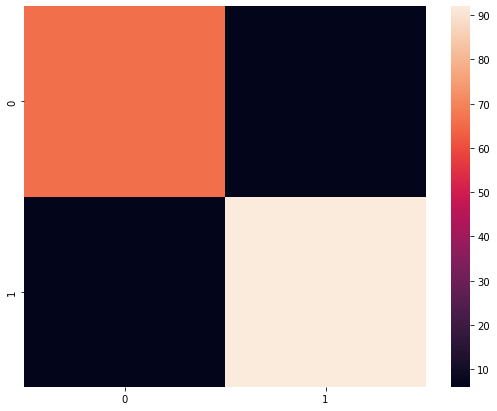

In [34]:
cfsmtx = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,7))
sns.heatmap(cfsmtx)
plt.show()

In [35]:
cfsmtx

array([[66,  6],
       [ 6, 92]])

$f1 = \frac{2}{\frac{1}{Precision} + \frac{1}{Recall}}$ <br>

$precision = \frac{TP}{TP + FP}$
$recall = \frac{TP}{TP + FN}$

## Cross Validation and Grid Search

In [36]:
param_grid={'criterion': ('gini', 'entropy'),'min_samples_leaf':(2,3,4)}
svm_clf = DecisionTreeClassifier()
cv = ShuffleSplit(n_splits=3, test_size=0.3, random_state=42)
cv_grd = GridSearchCV(svm_clf,param_grid=param_grid,verbose=2,cv=cv)

In [37]:
cv_grd.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END .................criterion=gini, min_samples_leaf=2; total time=   0.0s
[CV] END .................criterion=gini, min_samples_leaf=2; total time=   0.0s
[CV] END .................criterion=gini, min_samples_leaf=2; total time=   0.0s
[CV] END .................criterion=gini, min_samples_leaf=3; total time=   0.0s
[CV] END .................criterion=gini, min_samples_leaf=3; total time=   0.0s
[CV] END .................criterion=gini, min_samples_leaf=3; total time=   0.0s
[CV] END .................criterion=gini, min_samples_leaf=4; total time=   0.0s
[CV] END .................criterion=gini, min_samples_leaf=4; total time=   0.0s
[CV] END .................criterion=gini, min_samples_leaf=4; total time=   0.0s
[CV] END ..............criterion=entropy, min_samples_leaf=2; total time=   0.0s
[CV] END ..............criterion=entropy, min_samples_leaf=2; total time=   0.0s
[CV] END ..............criterion=entropy, min_sam

GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=42, test_size=0.3, train_size=None),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'min_samples_leaf': (2, 3, 4)},
             verbose=2)

In [38]:
cv_grd.best_estimator_

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=3)

## Nueral Net example: https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.99241&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

## Here is some good interactive visualization of Neural Nets in Action in Computer vision: https://cs.stanford.edu/people/karpathy/convnetjs/